In [1]:
import pickle

with open('ori.pkl', 'rb') as file:   
    ori = pickle.load(file)
with open('mask.pkl', 'rb') as file:   
    mask = pickle.load(file)
with open('out.pkl', 'rb') as file:   
    out = pickle.load(file)


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import math
import numpy as np

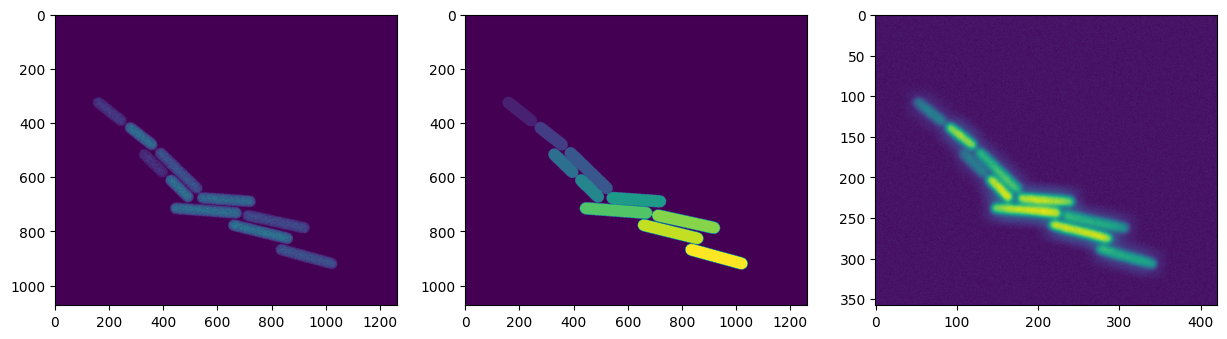

In [9]:
f, axarr = plt.subplots(1,3)
axarr[0].plot(100,100)
axarr[0].imshow(ori)
axarr[1].imshow(mask)
axarr[2].imshow(out)
plt.show()

In [43]:
#Final all mid points of cells

min_x = {}
max_x = {}
min_y = {}
max_y = {}

(maskWidth, maskHeight) = mask.shape
print(maskWidth, maskHeight)

for i in range(maskWidth):
    for j in range(maskHeight):
        #Add mask value to dictionaries
        if (not mask[i][j] in min_x.keys()):
            min_x[mask[i][j]] = math.inf
            max_x[mask[i][j]] = -1
            min_y[mask[i][j]] = math.inf
            max_y[mask[i][j]] = -1
        
        min_x[mask[i][j]] = min(min_x[mask[i][j]],i)
        max_x[mask[i][j]] = max(max_x[mask[i][j]],i)
        min_y[mask[i][j]] = min(min_y[mask[i][j]],j)
        max_y[mask[i][j]] = max(max_y[mask[i][j]],j)

midpt = {}

for k in min_x.keys():
    midpt[k] = ((min_x[k]+max_x[k])/2,(min_y[k]+max_y[k])/2)

del(midpt[0.0])
print(midpt)


1073 1263
{1.5259022e-05: (359.5, 202.0), 3.0518044e-05: (450.0, 318.0), 4.5777066e-05: (577.0, 456.0), 6.103609e-05: (549.5, 363.0), 7.629511e-05: (642.5, 459.5), 9.155413e-05: (684.0, 632.5), 0.00012207218: (724.5, 557.5), 0.0001373312: (765.0, 816.0), 0.00015259022: (802.0, 759.0), 0.00016784924: (894.0, 928.0)}


<function matplotlib.pyplot.show(close=None, block=None)>

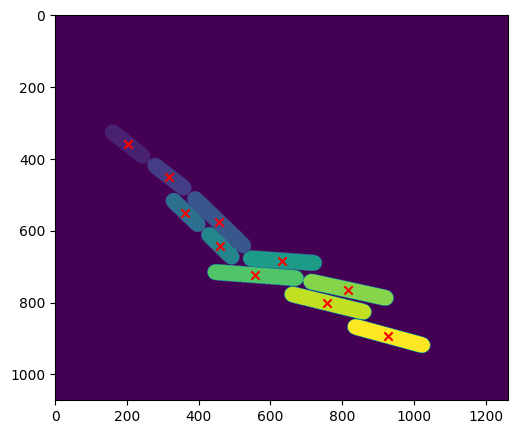

In [41]:
plt.imshow(mask)
for k in midpt:
    plt.scatter(midpt[k][1],midpt[k][0],color='red',marker='x')
plt.show

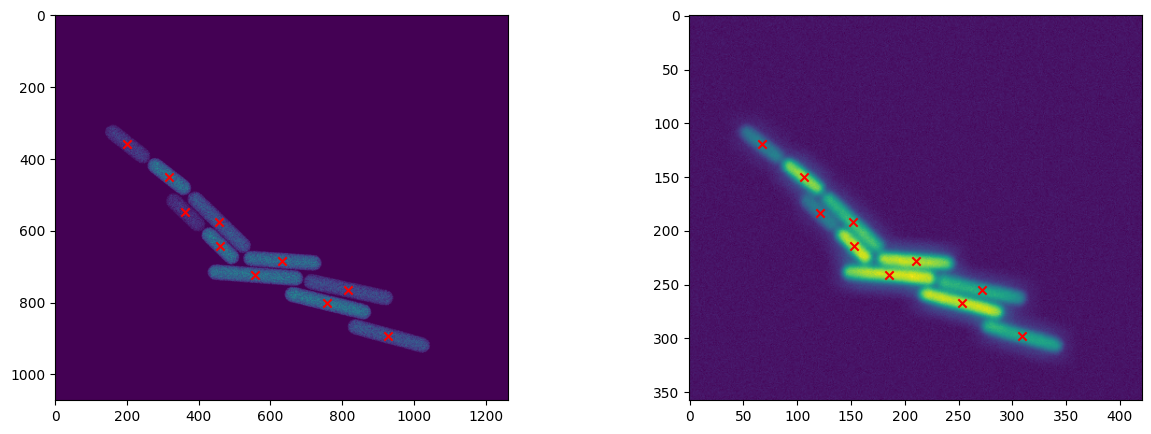

{1.5259022e-05: 0.00012207218, 3.0518044e-05: 0.00010681315, 4.5777066e-05: 1.5259022e-05, 6.103609e-05: 4.5777066e-05, 7.629511e-05: 0.0001373312, 9.155413e-05: 3.0518044e-05, 0.00012207218: 4.5777066e-05, 0.0001373312: 3.0518044e-05, 0.00015259022: 0.00010681315, 0.00016784924: 0.00012207218}
{1.5259022e-05: 29135, 3.0518044e-05: 56630, 4.5777066e-05: 44200, 6.103609e-05: 28118, 7.629511e-05: 61670, 9.155413e-05: 58298, 0.00012207218: 61558, 0.0001373312: 39408, 0.00015259022: 58904, 0.00016784924: 38988}


In [51]:
originalIntensity = {}
outputIntensity = {}


(originalWidth, originalHeight) = ori.shape
(outputWidth, outputHeight) = out.shape

f, axarr = plt.subplots(1,2)
axarr[0].imshow(ori)
axarr[1].imshow(out)
for k in midpt.keys():
    ratioX = midpt[k][0]/maskWidth
    ratioY = midpt[k][1]/maskHeight

    #Get intensity in original image
    originalX  = int(ratioX*originalWidth)
    originalY = int(ratioY*originalHeight)
    axarr[0].scatter(originalY,originalX,color='red',marker='x')

    originalIntensity[k] = ori[originalX][originalY]

    #Get intensity in output image
    outputX  = int(ratioX*outputWidth)
    outputY = int(ratioY*outputHeight)
    axarr[1].scatter(outputY,outputX,color='red',marker='x')

    outputIntensity[k] = out[outputX][outputY]

plt.show()

print(originalIntensity)
print(outputIntensity)
    

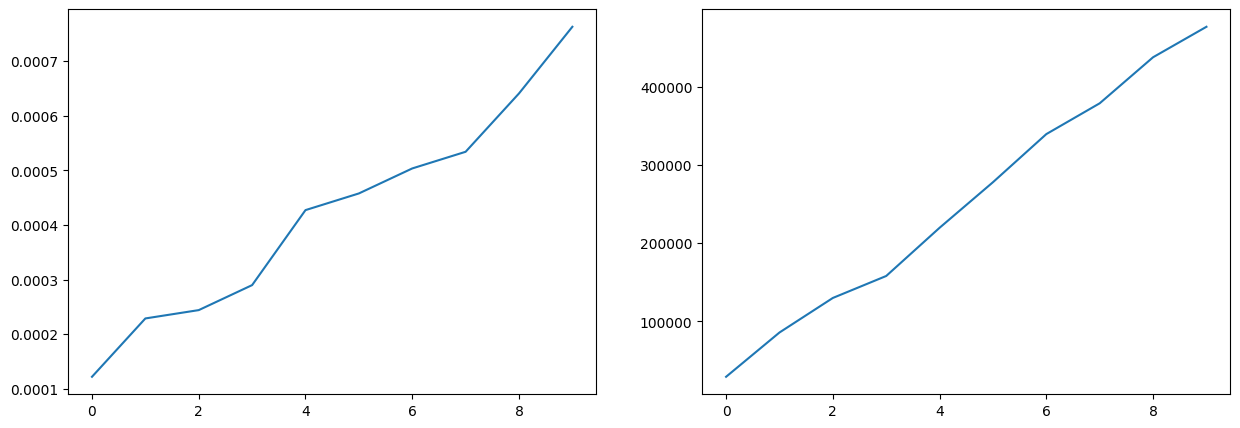

In [65]:
originalIntensityNp = np.asarray([originalIntensity[k] for k in originalIntensity.keys()])
outputIntensityNp = np.asarray([outputIntensity[k] for k in outputIntensity.keys()])

originalIntensityHistagram = np.cumsum(originalIntensityNp)
outputIntensityHistagram = np.cumsum(outputIntensityNp)

f, axarr = plt.subplots(1,2)
axarr[0].plot(originalIntensityHistagram)
axarr[1].plot(outputIntensityHistagram)
plt.show()
